In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
from sklearn import metrics

In [8]:
insu_data=pd.read_csv('insurance.csv')

In [9]:
insu_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
insu_data.shape

(1338, 7)

In [11]:
insu_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

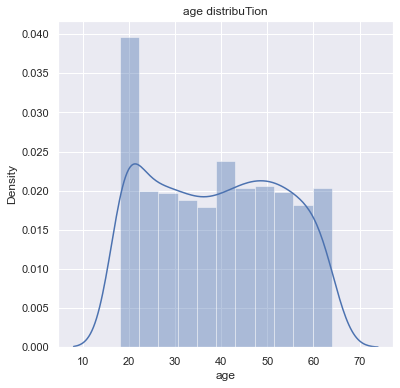

In [12]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insu_data['age'])
plt.title('age distribuTion')

plt.show

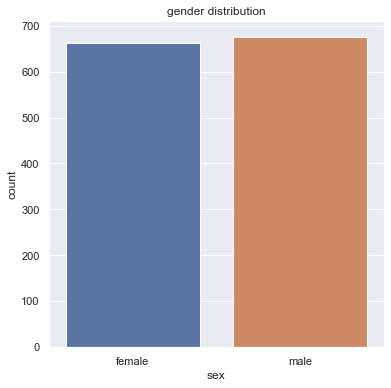

In [13]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insu_data)
plt.title('gender distribution')
plt.show()

In [14]:
insu_data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [15]:
insu_data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

# Encoding categorical features

In [16]:
insu_data.replace({'sex':{'male':0, 'female':1}},inplace=True)



In [17]:
insu_data.replace({'region':{'southwest':1,'northwest':3,'southeast':0,'northeast':2}},inplace=True)

In [18]:
insu_data.replace({'smoker':{'yes':0,'no':1}},inplace=True)

In [19]:
insu_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [20]:
x=insu_data.drop(columns='charges',axis=1)

In [21]:
y=insu_data['charges']

In [22]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [23]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

#  splitting the data into training and testing

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [25]:
x.shape

(1338, 6)

In [26]:
x_test.shape

(268, 6)

# model training

In [27]:
regressor=LinearRegression()

In [28]:
regressor.fit(x_train,y_train)

LinearRegression()

# model evaluation

In [29]:
trainig_data_prediction = regressor.predict(x_train)

# R squerd value

In [30]:
r2_train = metrics.r2_score(y_train,trainig_data_prediction)

In [31]:
r2_train

0.751505643411174

In [33]:
testing_data_prediction = regressor.predict(x_test)

In [34]:
r2_test = metrics.r2_score(y_test,testing_data_prediction)

In [35]:
r2_test

0.7447273869684077

In [36]:
input_data=(31,1,25.74,0,1,0)


# changing input data (tuple) to numpy array

In [37]:
input_data_as_np = np.asarray(input_data)

# reshape

In [42]:
input_data_reshaped = input_data_as_np.reshape(1,-1)

# prediction

In [45]:
prediction = regressor.predict(input_data_reshaped)

In [49]:
print("The insurance cost is : " , prediction)

The insurance cost is :  [3760.0805765]
